<a href="https://colab.research.google.com/github/kanyanut11/cs352-264-s0047/blob/main/Final_TelcoChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [ ]:
bucket='telcocustomerchurn'
data_key='WA_Fn-UseC_-Telco-Customer-Churn.csv'
data_location = 's3://{}/{}'.format(bucket,data_key)

pd.read_csv(data_location)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


 Undertanding the data
 

In [ ]:
df=pd.read_csv(data_location)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Using errors=’coerce’. It will replace all non-numeric values with NaN.
ref https://www.geeksforgeeks.org/python-pandas-to_numeric-method/

In [ ]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
#numpy.isnan()จะทดสอบว่าจะเป็น NaN หรือไม่
#ref https://www.geeksforgeeks.org/numpy-isnan-python/
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


สังเกตได้ว่าคอลัมน์tenureเป็น 0 ต้องลองดูว่าในแถวอื่นมี0ด้วยไหม

In [ ]:
df[df['tenure'] == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

ไม่มีค่าmissingในแถวอื่นๆ

Data Preparation


In [ ]:
#ลบแถวที่มีค่าขาดหายไปในคอลัมน์Tenure 
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
#เช็คว่าtenureมีค่า0ไหม
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

In [ ]:
#เติมค่าmissด้วยค่าเฉลี่ยของค่า TotalCharges
df.fillna(df["TotalCharges"].mean())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#เช็คค่าnull
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#เปลี่ยนSeniorCitizenจาก1,0 เป็น Yes,No
df["SeniorCitizen"]= df["SeniorCitizen"].map({0:"No", 1:"Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df = df.drop(['customerID'], axis = 1)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
#เซ็คค่าของInternetServiceเพราะสังเกตจะเป็นมีค่าbooleanรวมอยู่ด้วย
df["InternetService"].describe(include=['object', 'bool'])

count            7032
unique              3
top       Fiber optic
freq             3096
Name: InternetService, dtype: object

In [ ]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


<AxesSubplot:xlabel='gender', ylabel='count'>

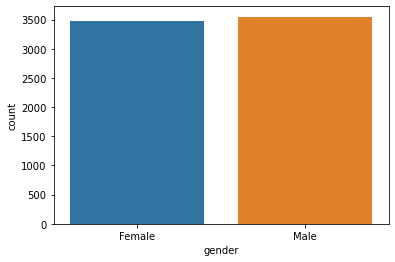

In [ ]:
#ดูปริมาณเพศของลูกค้า
plt.figure()
sns.countplot(x="gender", data=df)

<AxesSubplot:xlabel='gender', ylabel='count'>

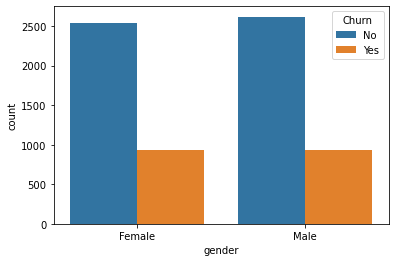

In [ ]:
#ดูจำนวนChurnตามเพศ
plt.figure()
sns.countplot(x="gender", hue="Churn", data=df)

In [ ]:
#จำนวนทั้ง2เพศที่ไม่Churn
df["Churn"][df["Churn"]=="No"].groupby(by=df["gender"]).count()

gender
Female    2544
Male      2619
Name: Churn, dtype: int64

In [ ]:
#จำนวนทั้ง2เพศที่ Churn
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()

gender
Female    939
Male      930
Name: Churn, dtype: int64

มีความแตกต่างเล็กน้อยในจำนวนลูกค้าที่Churnหรือเปลี่ยนผู้ให้บริการเห็นได้ว่าทั้งสองเพศมีพฤติกรรมใกล้เคียงกันมาก

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

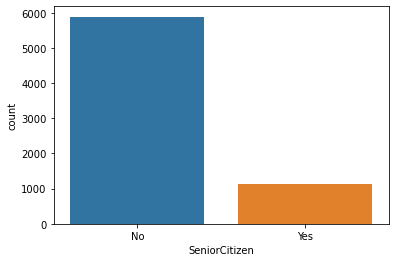

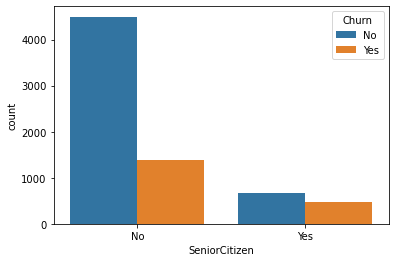

In [ ]:
#ลูกค้าจะเป็นผู้สูงอายุหรือไม่
plt.figure()
sns.countplot(x="SeniorCitizen", data=df)

#ลูจำนวนการchurnของกลุ่มผู้สูงอายุ
plt.figure()
sns.countplot(x="SeniorCitizen", hue="Churn", data=df)

สังเกตได้ว่าสัดส่วนผู้สูงอายุมีน้อยมากเลยจะเห็นได้ผู้สูงอายุส่วนใหญ่มีการยกเลิกที่ขึ้นข้างมาก

<AxesSubplot:xlabel='Partner', ylabel='count'>

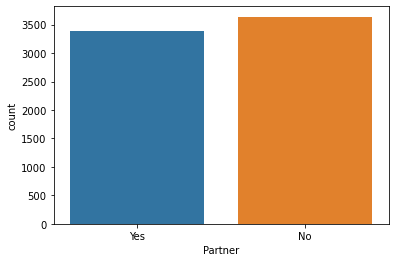

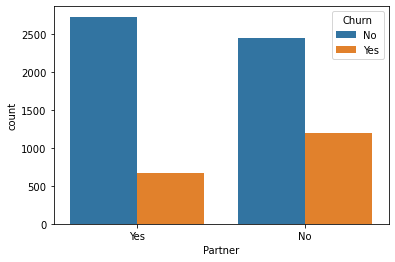

In [ ]:
##ลูกค้ามีคู่ครองหรือไม่
plt.figure()
sns.countplot(x="Partner", data=df)

#จำนวนการchurnของกลุ่มลูกค้าที่มีกับที่ไม่มีคู่ครอง
plt.figure()
sns.countplot(x="Partner", hue="Churn", data=df)


ลูกค้าที่ไม่มีคู่ครองมักจะยกเลิกมากกว่า

<AxesSubplot:xlabel='Dependents', ylabel='count'>

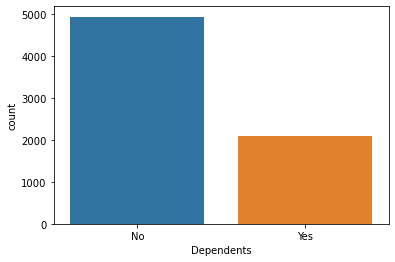

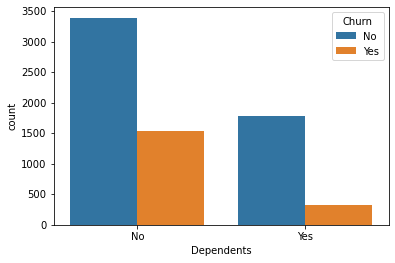

In [ ]:
#ลูกค้ามีผู้อยู่ในความอุปถัมภ์หรือไม่ 
plt.figure()
sns.countplot(x="Dependents", data=df)

#จำนวนการchurnของกลุ่มลูกค้าที่มีกับที่ไม่มีผู้อยู่ในความอุปถัมภ์
plt.figure()
sns.countplot(x="Dependents", hue="Churn", data=df)

ลูกค้าที่ไม่มีผู้อยู่ในความอุปถัมภ์มักจะยกเลิก

<AxesSubplot:xlabel='Contract', ylabel='count'>

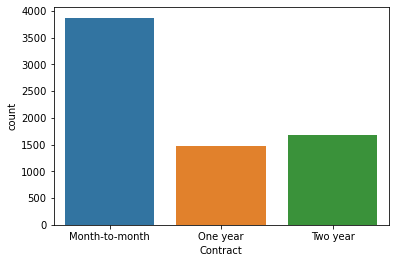

In [ ]:
#สัญญาของบริการที่ซื้อ
plt.figure()
sns.countplot(x="Contract", data=df)

<AxesSubplot:xlabel='Contract', ylabel='count'>

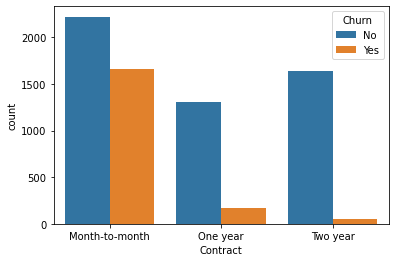

In [ ]:
#การchurnของแต่ละประเภทของสัญญาบริการ
plt.figure()
sns.countplot(x="Contract", hue="Churn", data=df)

เห็นได้ว่าสัญญาแบบMonth-to-monthมีการChurn มากที่สุดเมื่อเทียบกับ 1ปีและ2ปี

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

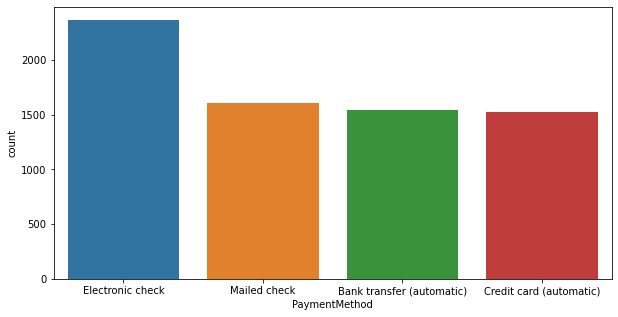

In [ ]:
#ช่องทางการชำระเงิน

plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", data=df)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

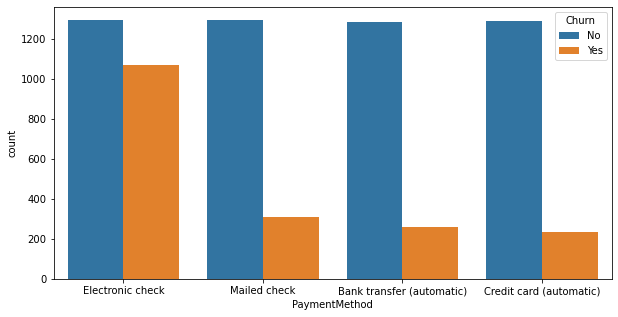

In [ ]:
#การchurnของแต่ละประเภทช่องทางการชำระเงิน
plt.figure(figsize=(10,5))
sns.countplot(x="PaymentMethod", hue="Churn", data=df)

ลูกค้าส่วนใหญ่ที่ย้ายออกใช้Electronic checkเป็นวิธีการชำระเงินส่วนลูกค้าที่เลือกใช้การโอนเงินอัตโนมัติด้วยCredit cardหรือการโอนเงินผ่านธนาคารและใช้Mailed checkเป็นวิธีการชำระเงินจะมีโอกาสน้อยที่จะย้ายออก

.....

In [ ]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

<AxesSubplot:xlabel='InternetService', ylabel='count'>

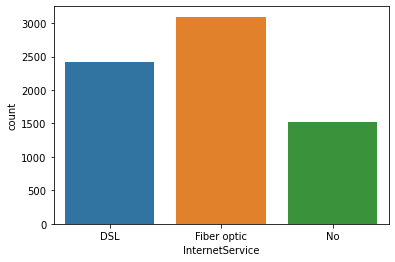

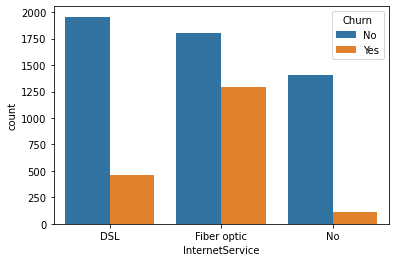

In [ ]:
#ประเภทของบริการInternet
plt.figure()
sns.countplot(x="InternetService", data=df)

#จำนวนการChurnของประเภทของบริการInternet
plt.figure()
sns.countplot(x="InternetService", hue="Churn", data=df)

In [ ]:
#แสดงจำนวนลูกค้าเพศชายที่ใช้ InternetService แล้ว มีการChurn
df[df["gender"]=="Male"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       992
Fiber optic      No       910
No               No       717
Fiber optic      Yes      633
DSL              Yes      240
No               Yes       57
dtype: int64

In [ ]:
#แสดงจำนวนลูกค้าเพศหญิงที่ใช้ InternetService แล้ว มีการChurn
df[df["gender"]=="Female"][["InternetService", "Churn"]].value_counts()

InternetService  Churn
DSL              No       965
Fiber optic      No       889
No               No       690
Fiber optic      Yes      664
DSL              Yes      219
No               Yes       56
dtype: int64

ลูกค้าจำนวนมากเลือกใช้บริการFiber opticและเห็นได้ชัดว่าลูกค้าที่ใช้Fiber opticมีอัตราการchurnสูง ซึ่งอาจบ่งบอกถึงความไม่พอใจกับบริการอินเทอร์เน็ตประเภทนี้
ลูกค้าที่มีบริการ DSL เป็นส่วนใหญ่และมีอัตราการเลิกใช้งานน้อยกว่าเมื่อเทียบกับบริการFiber optic

In [ ]:
#จำนวนการ churnในการใช้บริการต่างๆ
columns = {'MultipleLines':1, 'OnlineSecurity':2, 'OnlineBackup':3, 'DeviceProtection':4,
          'TechSupport':5, 'StreamingTV':6, 'StreamingMovies':7,'PhoneService':8}


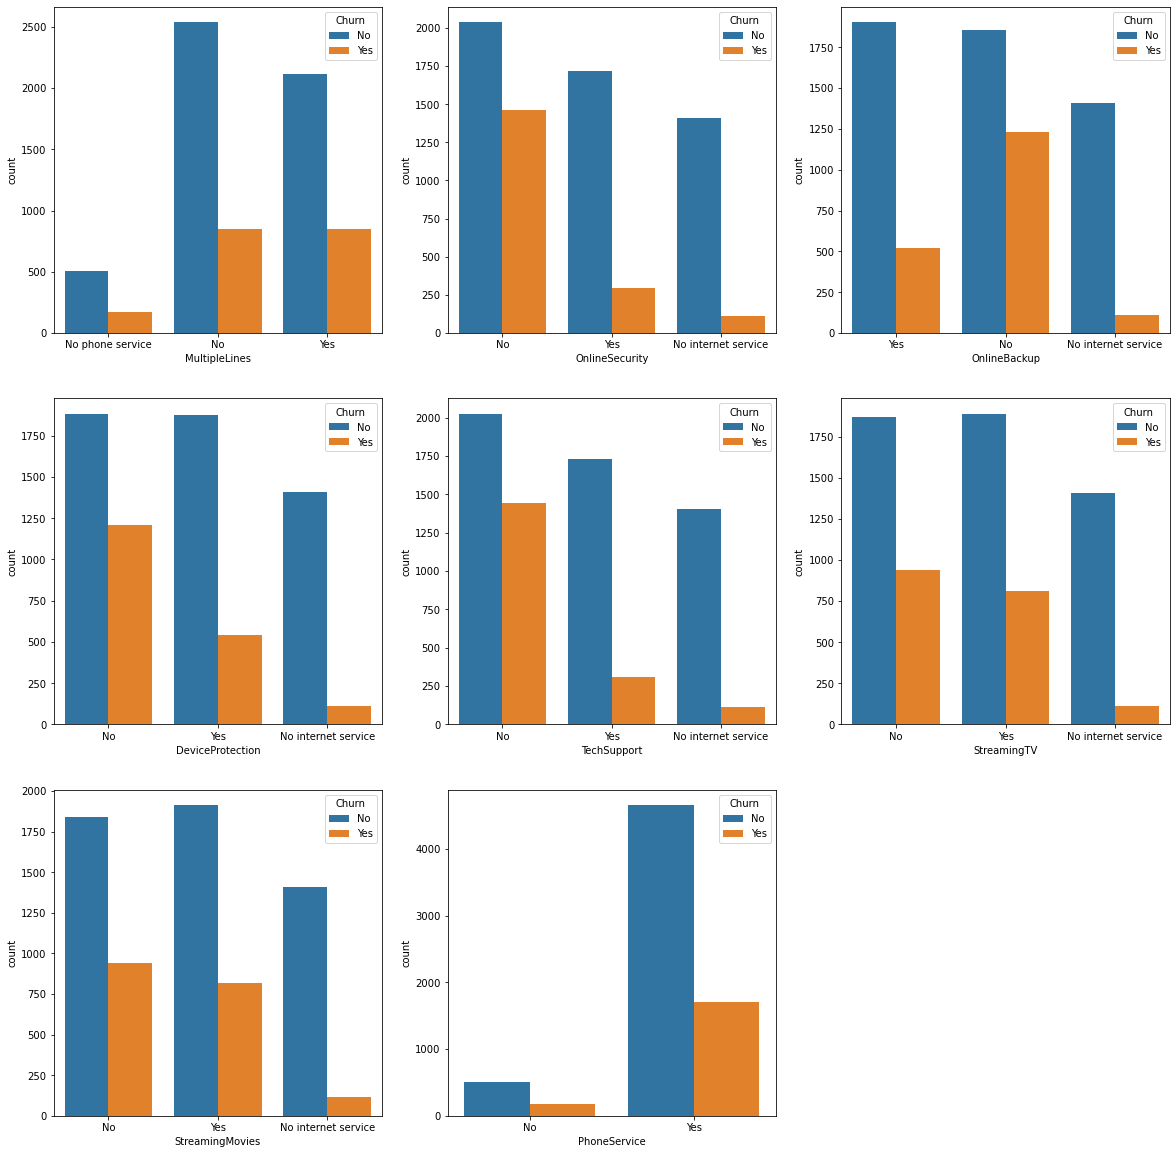

In [ ]:
plt.figure(figsize=(20, 42))

for key, value in columns.items():
    plt.subplot(6, 3, value)
    sns.countplot(x=key, hue='Churn', data=df)

ลูกค้าส่วนใหญ่Churnเมื่อไม่มีบริการ Online security ,OnlineBackup,TechSupport,StreamingTVและStreamingMovies 
แต่ในบริการMultipleLines ถึงจะมีหรือไม่มีก็จะมีอัตราการchurnใกลเคียงกัน
ลูกค้าส่วนน้อยไม่มีบริการโทรศัพท์ และลูกค้ารายที่ประมาณแค่1/3เท่านั้นที่จะมีการยกเลิก

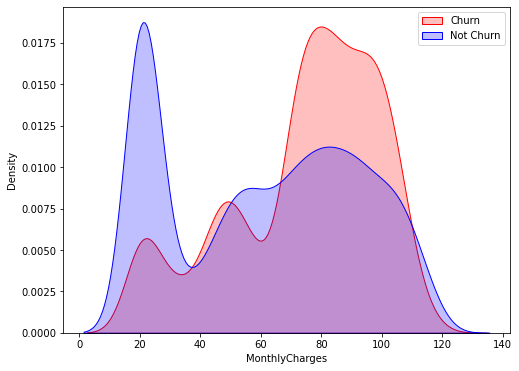

In [ ]:
#ดูความหนาแน่นของการchurnตามค่าบริการรายเดือน
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']["MonthlyCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']["MonthlyCharges"], color='blue', shade=True)
plt.legend(["Churn","Not Churn"],loc='upper right');

ลูกค้าที่มีค่าบริการรายเดือนสูงกว่าก็มีแนวโน้มที่จะchurn

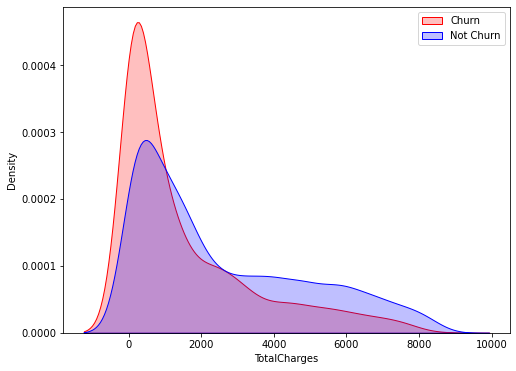

In [ ]:
#ดูความหนาแน่นของการchurnตามค่าบริการรวม
plt.figure(figsize=(8, 6))
sns.kdeplot(df[df['Churn'] == 'Yes']["TotalCharges"], color='red', shade=True)
sns.kdeplot(df[df['Churn'] == 'No']["TotalCharges"], color='blue', shade=True)
plt.legend(["Churn","Not Churn"],loc='upper right');

<Figure size 576x432 with 0 Axes>

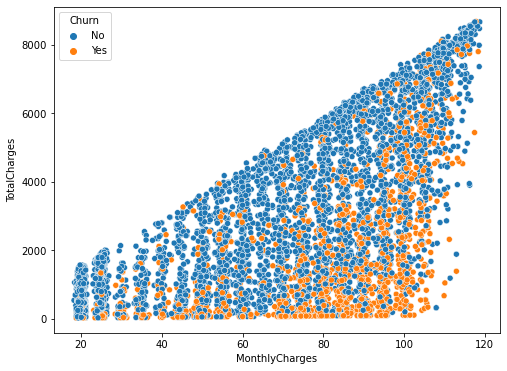

In [ ]:
#ดูความหนาแน่นของการchurnตามค่าบริการรายเดือนและค่าบริการรวม
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges',hue='Churn', data=df);

สามารถยืนยันได้ว่าค่าใช้จ่ายที่สูงขึ้นนำไปสู่การChurn

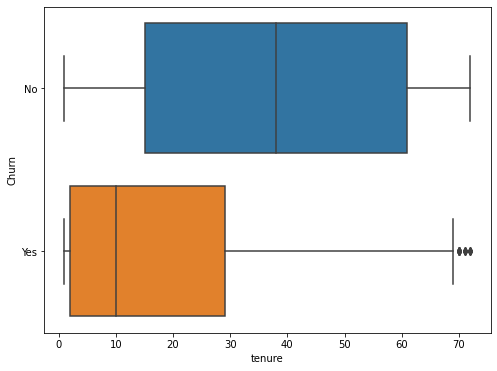

In [ ]:
#เมื่อเทียบtenureกับChurn
plt.figure(figsize=(8,6))
sns.boxplot(x='tenure', y='Churn',data=df);

ลูกค้าใหม่มีแนวโน้มที่จะChurnมากขึ้น

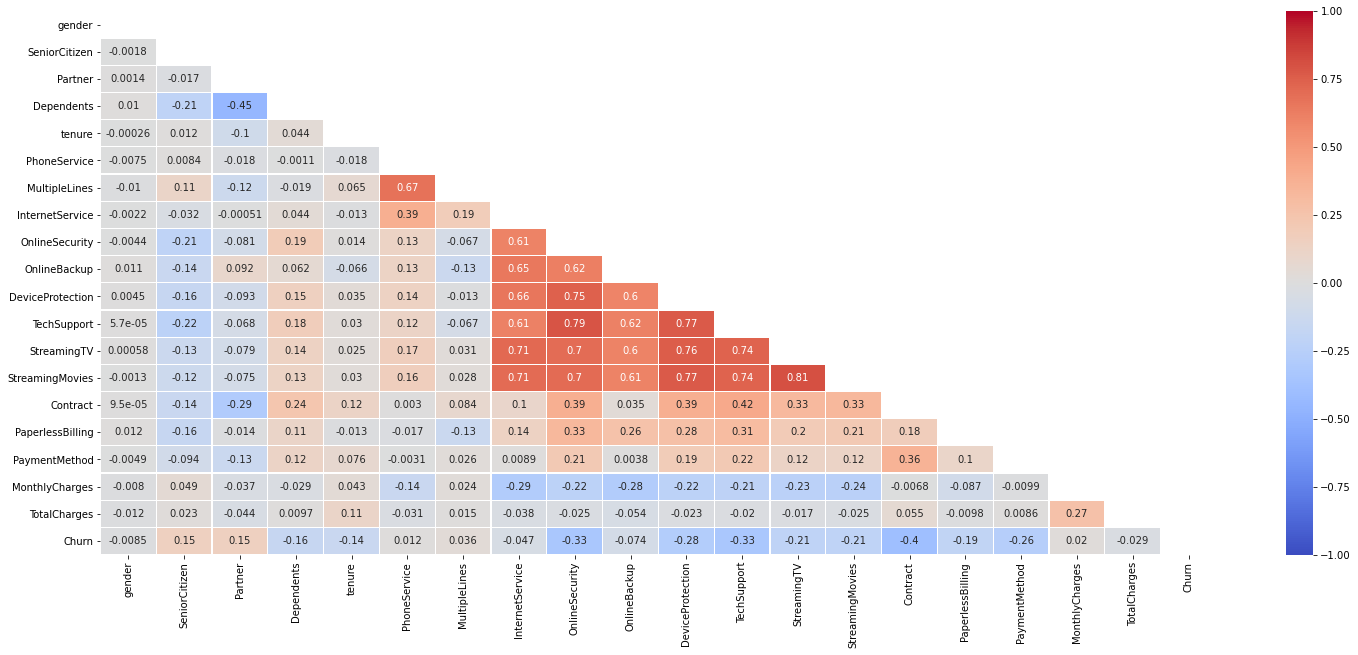

In [ ]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

แยกข้อมูลออกเป็นชุดฝึกและชุดทดสอบ train,test sets

In [ ]:
#object to int
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
df = df.apply(lambda x: object_to_int(x))
df.head(15)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


#ref https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
ค้นหาความสัมพันธ์แบบคู่ของคอลัมน์ทั้งหมดในdataframe ค่า ใดๆnaจะถูกยกเว้นโดยอัตโนมัติ สำหรับคอลัมน์ประเภทข้อมูลที่ไม่ใช่ตัวเลขใน dataframe คอลัมน์นั้นจะถูกละเว้น

In [ ]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [ ]:
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [ ]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

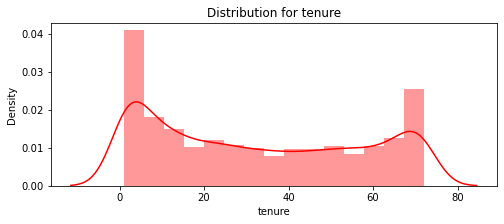

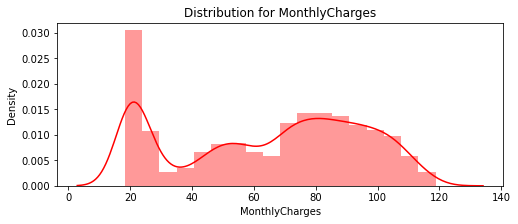

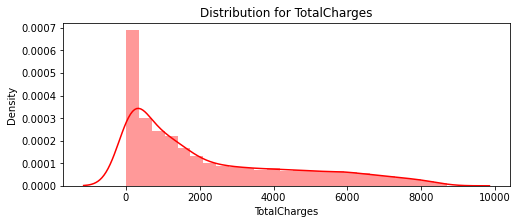

In [ ]:
num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

เนื่องจากคุณสมบัติเชิงตัวเลขมีการกระจายตามช่วงค่าต่างๆ ฉันจะใช้สเกลาร์มาตรฐานเพื่อปรับขนาดให้อยู่ในช่วงเดียวกัน

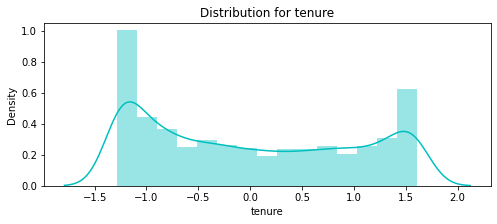

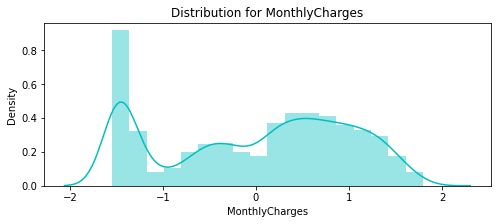

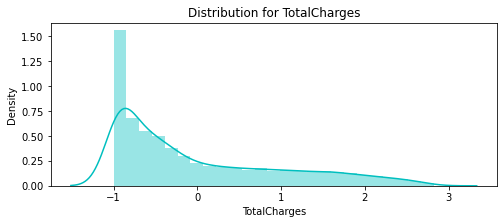

In [ ]:
#กำหนดคุณลักษณะที่เป็นตัวเลขมาตรฐาน
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')),
                       columns=num_cols)
for feat in numerical_cols: distplot(feat, df_std, color='c')

In [ ]:
# แบ่งคอลัมน์ออกเป็น 3 หมวดหมู่หนึ่งหรือมาตรฐานหนึ่งสำหรับการเข้ารหัสฉลากและอีกหนึ่งสำหรับการเข้ารหัสร้อน
cat_cols_ohe =['PaymentMethod', 'Contract', 'InternetService'] # ที่ต้องการการเข้ารหัสแบบร้อนครั้งเดียว
cat_cols_le = list(set(X_train.columns)- set(num_cols) - set(cat_cols_ohe)) #ผู้ที่ต้องการการเข้ารหัสฉลาก

In [ ]:
scaler= StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

Machine Learning Model Evaluations and Predictions

In [ ]:
#KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 11) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7753554502369668


In [ ]:
#Random Forest
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)
print (metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [ ]:
#Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


ในการประเมินว่าแบบจำลองทำงานได้ดีหรือไม่ตามคะแนนโมเดลเหล่านี้ Random Forest ดีที่สุด

In [ ]:
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.71      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



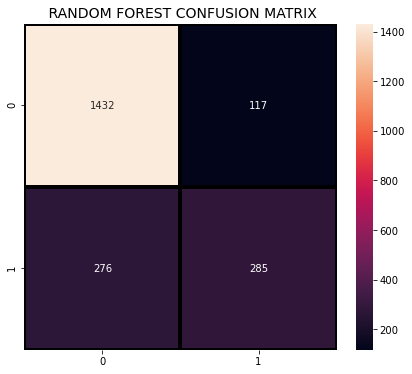

In [ ]:
plt.figure(figsize=(7,6))
sns.heatmap(confusion_matrix(y_test, prediction_test),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" RANDOM FOREST CONFUSION MATRIX",fontsize=14)
plt.show()

จากCONFUSION MATRIX เห็นได้ว่า
มีทั้งหมด 1432+117 =1549 ค่าที่ไม่churnจริง และอัลกอริธึมคาดการณ์ 1,432 รายการเป็นแบบไม่ churn และ 117 รายการเป็นแบบ churn 
ในขณะที่มีค่าchurn จิงที่ 276+285=561 และอัลกอริธึมคาดการณ์ 276 รายการว่าเป็นค่าที่ไม่ churn และ 285 รายการเป็นค่าที่churn